# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак:  
* Exited — факт ухода клиента

### План выполнения проекта
* Загрузите и подготовьте данные. Поясните порядок действий.
* Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
* Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
* Проведите финальное тестирование.

## Подготовка данных

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve


In [55]:
df = pd.read_csv('Churn.csv')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [57]:
df['RowNumber'].nunique()

10000

Столбец RowNumver можно удалить, так как он выполняет роль индекса, CustomerId и Surname так как при обучении модели в них нет необходимости

In [58]:
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

Проверим датафрейм на наличие дубликатов

In [59]:
df.duplicated().sum()

0

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Дубликаты в датафрейме отсутствуют

Приведем названия всех столбцов к стандартному принятому виду

In [61]:
df = df.rename(columns={ 
                        'CreditScore': 'credit_score', 
                        'Geography': 'geography', 
                        'Gender': 'gender', 
                        'Age': 'age', 
                        'Tenure': 'tenure', 
                        'Balance': 'balance', 
                        'NumOfProducts': 'num_of_products', 
                        'HasCrCard': 'has_cr_card', 
                        'IsActiveMember': 'is_active_member', 
                        'EstimatedSalary': 'estimated_salary', 
                        'Exited': 'exited'
                        })

Обработаем пропуски в столбце tenure

посмотрим на распределение и уникальные значения

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

(array([382., 952., 950., 928., 885., 927., 881., 925., 933., 882., 446.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

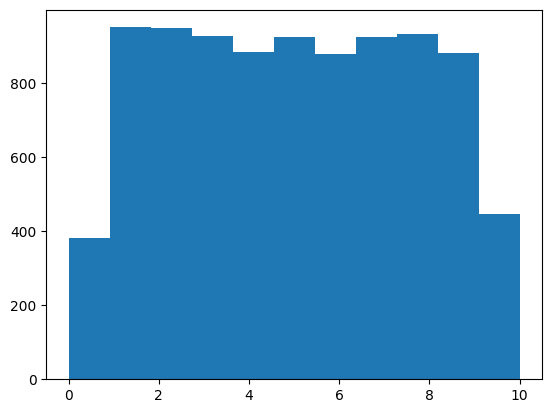

In [62]:
print(df['tenure'].unique())
display(df['tenure'].value_counts())
plt.hist(df['tenure'], bins=11)

In [63]:
df['tenure'].isna().sum()/len(df)*100

9.09

9% от датафрейма большая доля чтобы просто удалить такой объем данных. Заменим пропущенные значения на медианные.

In [64]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

## Исследование задачи

Немного пробедимся по данным, чтобы визуально оценить клинтов банка. 

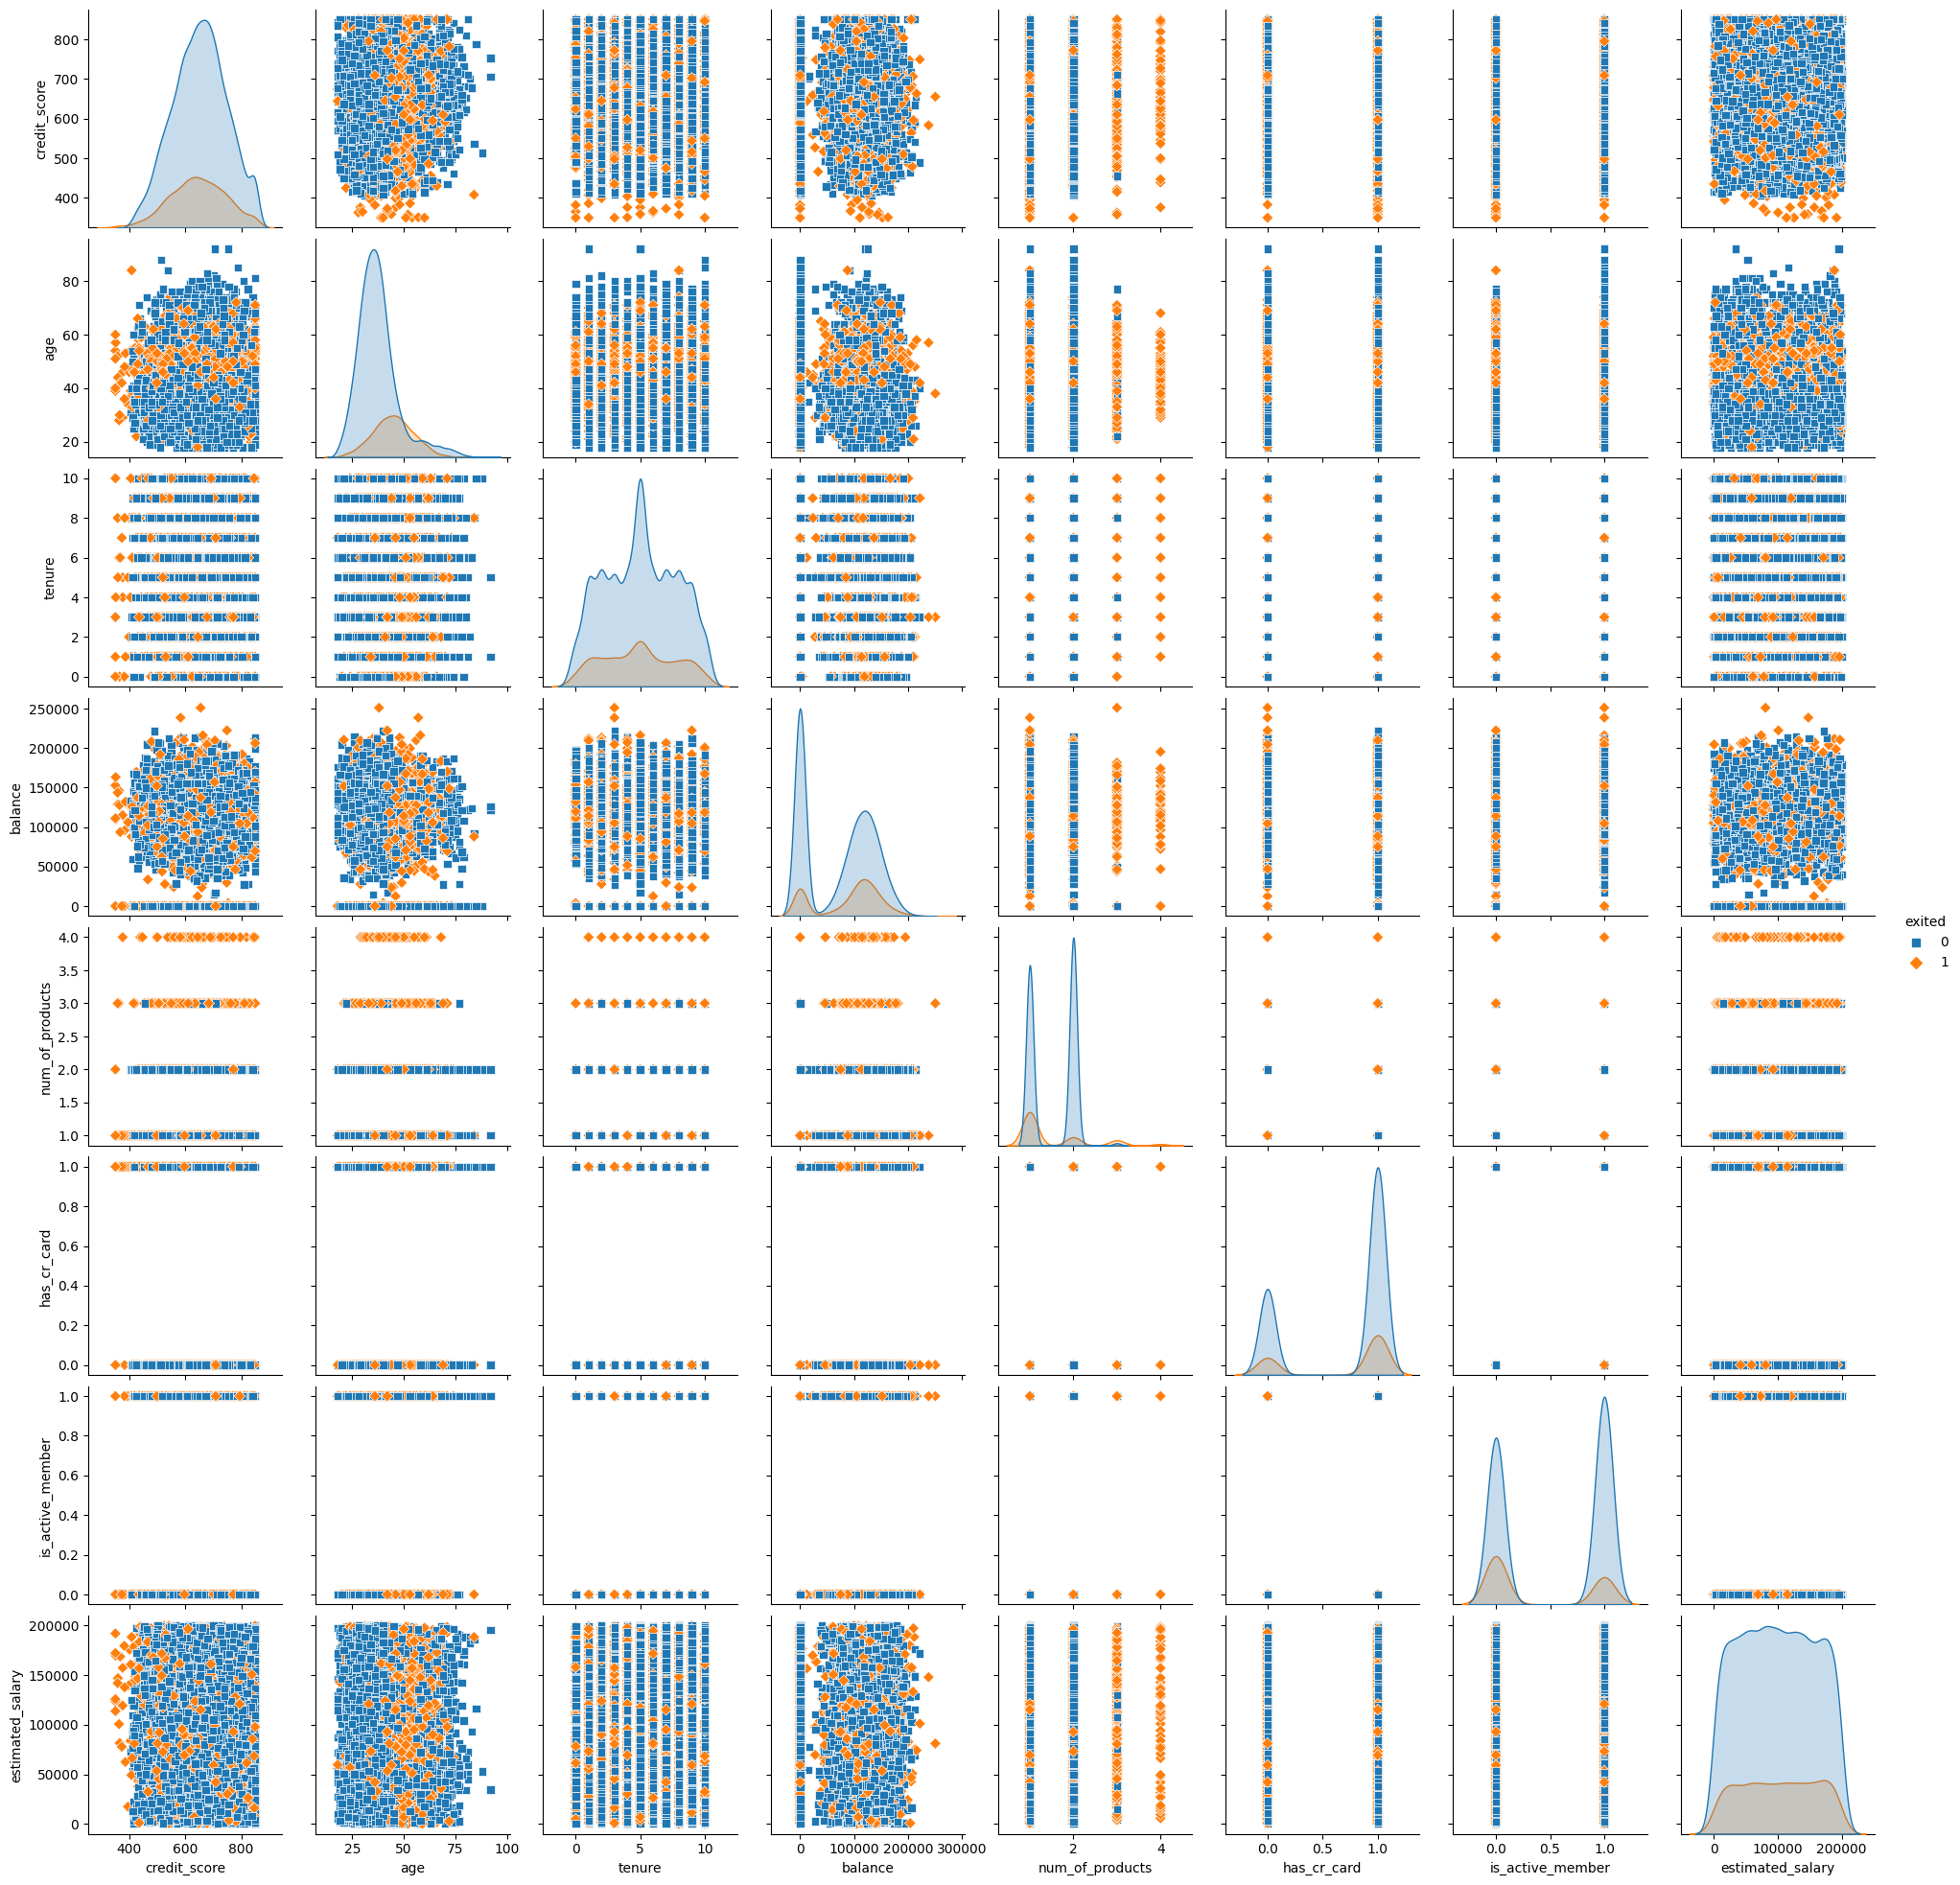

In [65]:
sns.pairplot(data=df, hue='exited', markers=["s", "D"])

Посмотрим на зависимость страны проживания и гендера от целевого признака

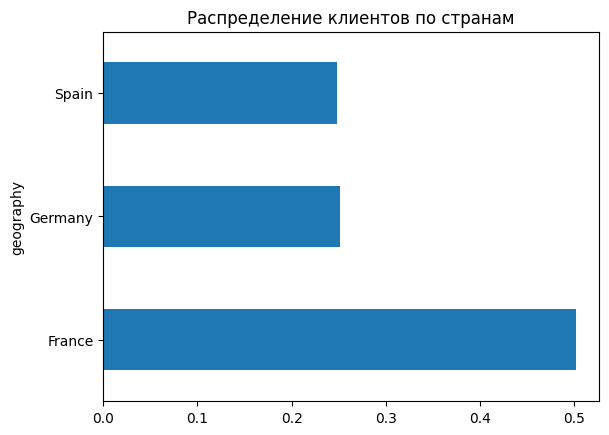

In [66]:
df['geography'].value_counts(normalize=True).plot.barh(title='Распределение клиентов по странам')
plt.show()

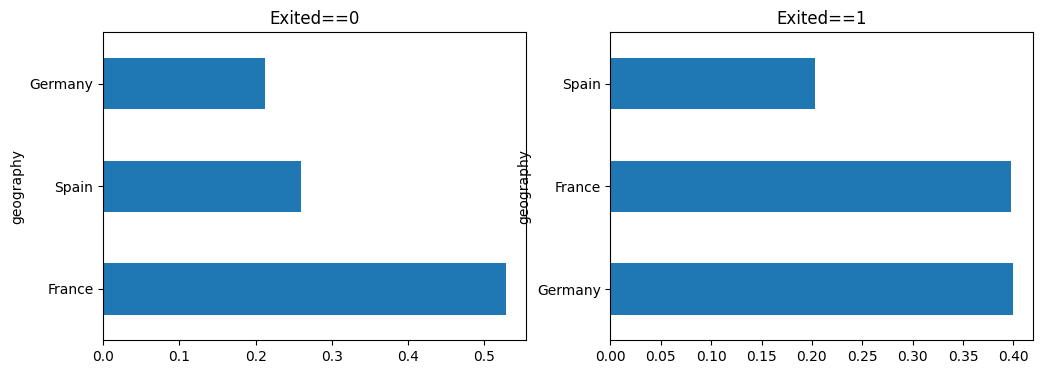

In [67]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
df[df['exited']==0]['geography'].value_counts(normalize=True).plot.barh(title='Exited==0', ax=ax[0])
df[df['exited']==1]['geography'].value_counts(normalize=True).plot.barh(title='Exited==1', ax=ax[1])
plt.show()

Большинство клиентов, которые ушли от банка находились в Германии (в Германии также наблюдается наименьшая доля лояльных клиентов) и Франции, при этом большая доля лояльных клиентов находится во Франции (стоит учесть, что во Франции в целом находится большее количество клиентов).

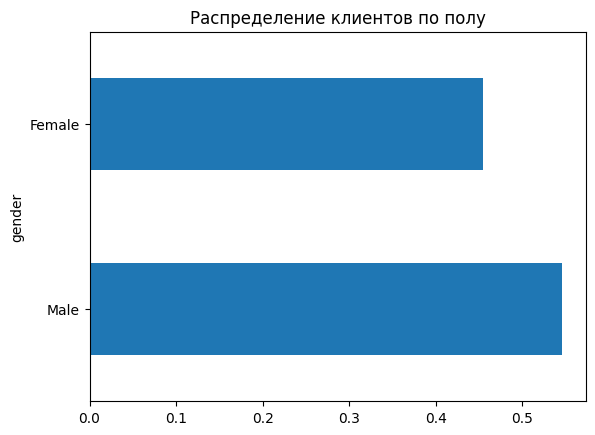

In [68]:
df['gender'].value_counts(normalize=True).plot.barh(title='Распределение клиентов по полу')
plt.show()

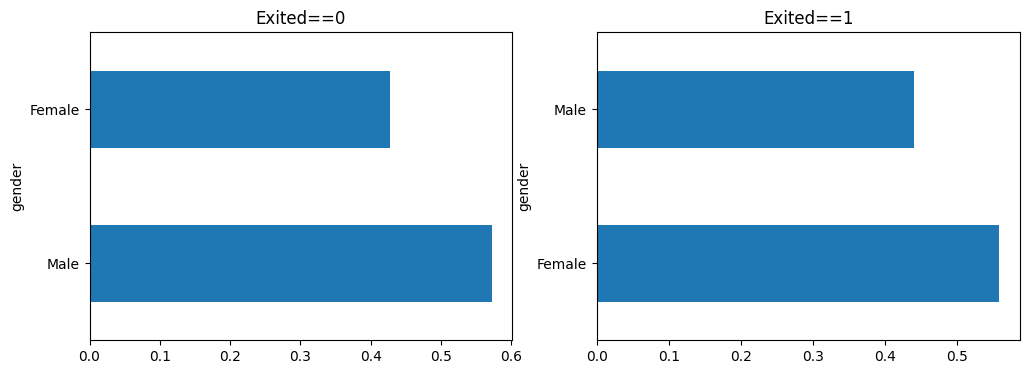

In [69]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
df[df['exited']==0]['gender'].value_counts(normalize=True).plot.barh(title='Exited==0', ax=ax[0])
df[df['exited']==1]['gender'].value_counts(normalize=True).plot.barh(title='Exited==1', ax=ax[1])
plt.show()

На основе краткого исследовательского анализа данных было выявлено:

* Ушедшие клиенты незначительно старше, нежели клиенты, которые остались.
* Большая доля ушедших клиентов обладала большим балансом на счете, нежели клиенты, которые остались с банком.
* Больше всего ушедших клиентов банка находятся в категории людей, которые обладали всего лишь 1-м продуктом. При этом наибольшее количество людей, оставшихся с банком обладали 2-мя продуктами.
* Среди активных клиентов ушедших клиентов меньше.
* Большинство клиентов банка находятся во Франции, однако среди ушедших клиентов преобладают пользователи из Германии.
* Большинство клиентов банка мужчины, однако среди ушедших клиентов преобладают женщины.
* В качестве небольшого резюме, можно подвести итог: на первый взгляд похоже, что большинство клиентов, которые ушли из банка это люди более старшего возраста с бОльшим количеством денег на счетах, и пользующиеся преимущественно 1 продуктом.

Переведем техникой OHE категориальные признаки в численные для столбков Gender и Geography

In [70]:
df=pd.get_dummies(df, columns=['gender'], drop_first=True, dtype=int)
df=pd.get_dummies(df, columns=['geography'], drop_first=True, dtype=int)
df

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,1,0


Построим тепловую карту, чтобы посмотреть на корреляцию между признаками:

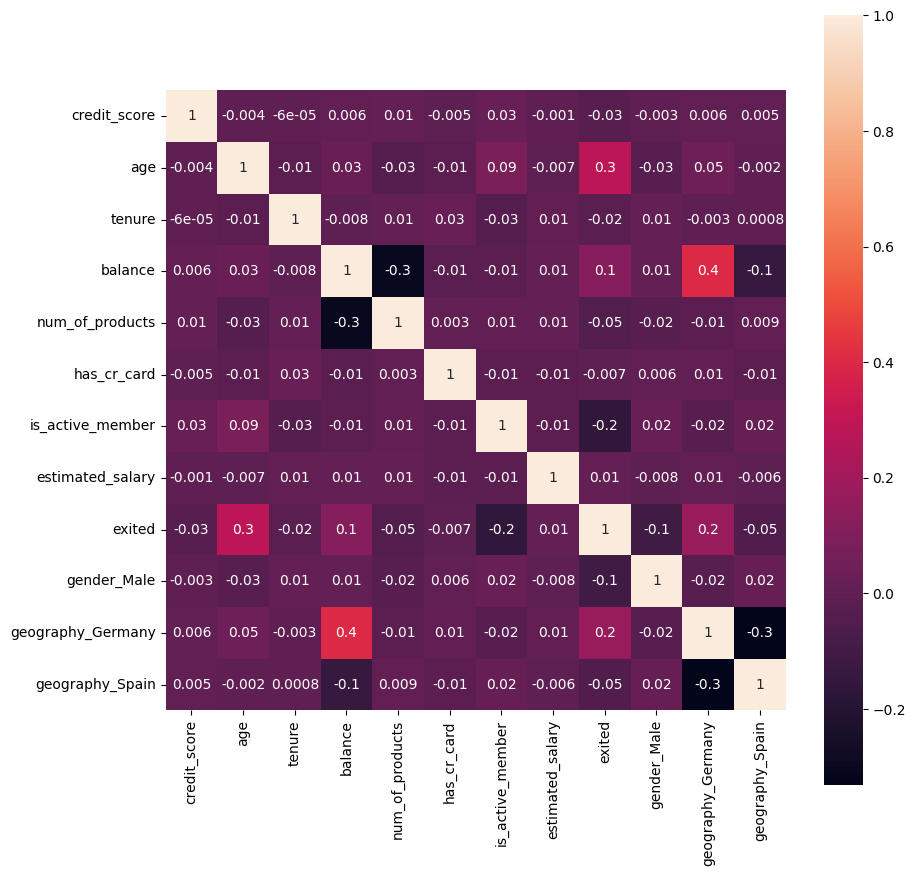

In [71]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', ax=ax, square=True)
plt.show()

Видим, что сильнее всего на целевой признак exited влияет возраст, баланс на счету и территориальная принадлежность к Германии. То есть чем старше клиент, или чем больше средств на счету, тем больше вероятность, что он откажется отуслуг банка. Также клиенты из Германии чаще прекращают сотрудничество. Обратную корреляцию можно увидеть в признаке is_active_member - чем активнее клиент, тем меньше вероятность, что он покинет банк.



Проверим какой дисбаланс в целевом столбце

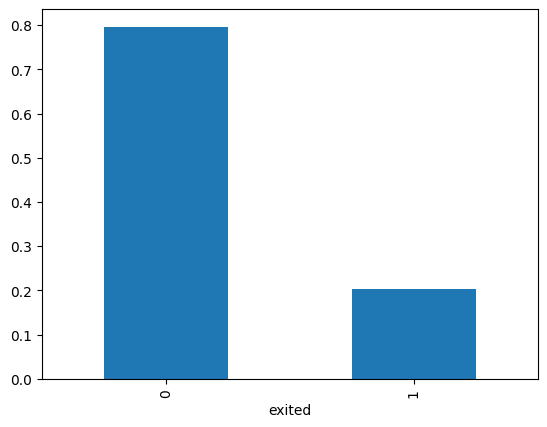

In [72]:
df['exited'].value_counts(normalize=True).plot.bar()
plt.show()

масштабируем признаки стандартизировав их

In [73]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(df[numeric])

df[numeric] = scaler.transform(df[numeric])
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,0,0,1
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,0,0,1


создадим тренировочную, проверочную и тестовую выборки в соотношении 60/20/20

In [74]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=123)
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=123)

In [75]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

Создадим модели логистической регрессии, рещающего дерева и случайного леса без применения методов исправления баланса и проверим ее метриками AUC-ROC и F1 

Логистическая регрессия

In [76]:
model_lr = LogisticRegression(random_state=123, solver='liblinear')
model_lr.fit(features_train, target_train)
prediction_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, prediction_lr)
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_lr = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_lr))
print('F1-мера:', f1_lr)
print('AUC-ROC:',roc_auc_lr)


Матрица ошибок:
 [[1549   57]
 [ 320   74]]
F1-мера: 0.28190476190476194
AUC-ROC: 0.7470794798692719


Решающее дерево

Воспользуемся GridSearchCV для подбора оптимальных гиперпараметров модели машинного обучения на основе кросс-валидации

In [77]:
params_tree = {'max_depth': range (1, 15)}
tree = DecisionTreeClassifier(random_state=123)
grid_tree = GridSearchCV(tree, params_tree)
grid_tree.fit(features_train, target_train)
print(grid_tree.best_params_)

{'max_depth': 6}


In [78]:
model_tree = DecisionTreeClassifier(random_state=123, max_depth=6)
model_tree.fit(features_train, target_train)
prediction_tree = model_tree.predict(features_valid)
f1_tree = f1_score(target_valid, prediction_tree)
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_tree = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_tree))
print('F1-мера:', f1_tree)
print('AUC-ROC:',roc_auc_tree)

Матрица ошибок:
 [[1550   56]
 [ 225  169]]
F1-мера: 0.5460420032310178
AUC-ROC: 0.8414321927290428


Случайный лес

In [79]:
params_forest = {'max_depth': range (1, 15), 'n_estimators' : range (10, 101, 10)}
forest = RandomForestClassifier(random_state=123)
grid_forest = GridSearchCV(forest, params_forest)
grid_forest.fit(features_train, target_train)
print(grid_forest.best_params_)

{'max_depth': 12, 'n_estimators': 70}


In [80]:
model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70)
model_forest.fit(features_train, target_train)
prediction_forest = model_forest.predict(features_valid)
f1_forest = f1_score(target_valid, prediction_forest)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_forest = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_forest))
print('F1-мера:', f1_forest)
print('AUC-ROC:',roc_auc_forest)

Матрица ошибок:
 [[1555   51]
 [ 210  184]]
F1-мера: 0.5850556438791732
AUC-ROC: 0.8659863709060567


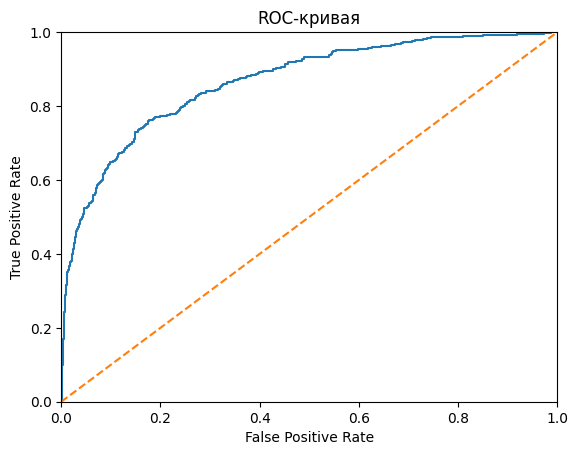

In [81]:
fpr, tpr, tresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Наилучшие результаты по F1 и AUC-ROC показывает модель случайного леса - 0.585, однако это не превышает необходимого 0.59 и результаты далеки от единицы. Потребуется устранение дисбаланса классов, очень велика доля истинно отрицальных ответов и мала доля ложноположительных.

## Борьба с дисбалансом

Теперь продолжим улучшать результат лучшей модели, случайного леса

Используем взвешивание классов

In [82]:
model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70, class_weight='balanced')
model_forest.fit(features_train, target_train)
prediction_forest = model_forest.predict(features_valid)
f1_forest = f1_score(target_valid, prediction_forest)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_forest = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_forest))
print('F1-мера:', f1_forest)
print('AUC-ROC:',roc_auc_forest)

Матрица ошибок:
 [[1491  115]
 [ 179  215]]
F1-мера: 0.5939226519337016
AUC-ROC: 0.8670910481632963


Показатели улучшились:   
до AUC-ROC: 0.8659 F1-мера: 0.5850 после AUC-ROC: 0.8670 F1-мера: 0.5939

Увеличение выборки

In [93]:
repiat = 10
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
features_upsampled = pd.concat([features_zeros]+[features_ones]*repiat)
target_upsapled = pd.concat([target_zeros]+[target_ones]*repiat)
features_upsampled = shuffle(features_upsampled, random_state=12345)
target_upsapled = shuffle(target_upsapled, random_state=12345)

model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70, class_weight='balanced')
model_forest.fit(features_upsampled, target_upsapled)
prediction_forest = model_forest.predict(features_valid)
f1_forest = f1_score(target_valid, prediction_forest)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_forest = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_forest))
print('F1-мера:', f1_forest)
print('AUC-ROC:',roc_auc_forest)

Матрица ошибок:
 [[1427  179]
 [ 138  256]]
F1-мера: 0.617611580217129
AUC-ROC: 0.8605704496463137


Показатели улучшились:   
до AUC-ROC: 0.8670 F1-мера: 0.5939 после AUC-ROC: 0.8605 F1-мера: 0.6176

Уменьшение выборки

In [91]:
fraction = 0.1
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70, class_weight='balanced')
model_forest.fit(features_downsampled, target_downsampled)
prediction_forest = model_forest.predict(features_valid)
f1_forest = f1_score(target_valid, prediction_forest)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
roc_auc_forest = roc_auc_score(target_valid, probabilities_one_valid)
print('Матрица ошибок:\n', confusion_matrix(target_valid, prediction_forest))
print('F1-мера:', f1_forest)
print('AUC-ROC:',roc_auc_forest)

Матрица ошибок:
 [[747 859]
 [ 38 356]]
F1-мера: 0.44251087632069613
AUC-ROC: 0.8454518588288841


Уменьшение выборки дало наоборот отрицательный результат

Изменение порога

In [89]:
model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70)
model_forest.fit(features_train, target_train)
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
f1_best = 0
threshold_best = 0
for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold

print('F1-мера =', f1_best, 'при пороге равном', threshold_best) 

F1-мера = 0.6307884856070088 при пороге равном 0.32


## Тестирование модели

Наилучшее значение показала модель случайного леса при изменении порога. Проверим на тестовой выборке

In [90]:
model_forest = RandomForestClassifier(random_state=123, max_depth=12, n_estimators=70)
model_forest.fit(features_train, target_train)
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
f1_best = 0
threshold_best = 0
for threshold in np.arange(0, 0.5, 0.02):
    predicted_test = probabilities_one_test > threshold
    f1 = f1_score(target_test, predicted_test)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold
roc_auc_forest = roc_auc_score(target_test, probabilities_one_test)
print('Матрица ошибок:\n', confusion_matrix(target_test, predicted_test))
print('AUC-ROC:', roc_auc_forest)
print('F1-мера =', f1_best, 'при пороге равном', threshold_best) 

Матрица ошибок:
 [[1536   60]
 [ 206  198]]
AUC-ROC: 0.8584595771607234
F1-мера = 0.6364749082007344 при пороге равном 0.32


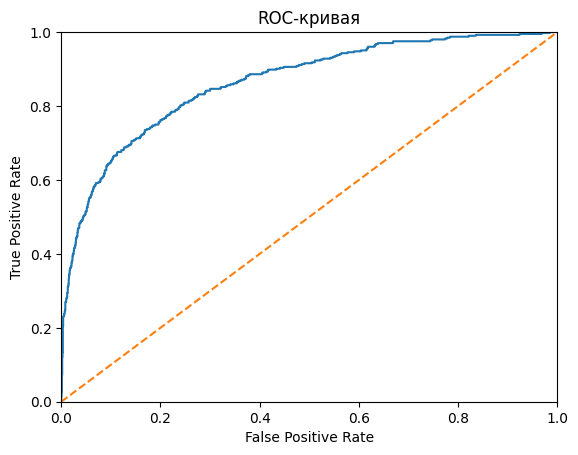

In [87]:
fpr, tpr, tresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Значение F1-меры на тестовой выборке - 0.6359, что превышает необходимые 0.59.

### Вывод

Был исследован баланс классов, обучены модели без учёта дисбаланса:

* для логистической регрессии F1-мера = 0.2819
* для решающего дерева F1-мера = 0.5460
* для случайного леса F1-мера = 0.5850

По итогам исследования мы определили, что необходимого значения F1-меры в 0.59 невозможно достичь без учета дисбаланса классов.

Далее те же модели были изучены с помощью различных методов устранения дисбаланса классов:  

* взвешивание классов - лучший рез-т - случайный лес 0.5939
* уменьшение выборки - лучший рез-т - случайный лес 0.4602
* увеличение выборки - лучший рез-т - случайный лес 0.6176
* изменения порога - лучший рез-т - случайный лес 0.6307  

По результатам исследования наилучшее значение F1-меры показывает модель случайного леса при изменении порога:

0.6307 на валидационной выборке
0.6364 на тестовой выборке.